In [33]:
import numpy as np
import networkx as nx
import scipy as sp
from ripser import ripser
import persim
import re
from matplotlib import pyplot as plt

In [34]:
def setup(name):
    #Basically get a list of strings with each graphs PH intervals(and some other garbage)
    def Masterlist():
        #THIS LINE MUST BE CHANGED BASED ON THE FILE PATH IN YOUR COMPUTER
        if name == 'Social':
            filepath = "/PH_intervals/Social_unweighted_undirected_natural"
        if name == 'Family':
            filepath = "/PH_intervals/ORIGINAL_SOURCE_PH"
        if name == 'Social_bfs':
            filepath = "/PH_intervals/Social_BFS_PH"
        if name == 'Family_bfs':
                filepath = "/PH_intervals/Family_BFS_PH"
        with open(filepath) as ofile:
            data = ofile.read()
            data = data.replace('\n',"")
            pattern = re.compile(r'kinsources(.*?)Boundary')
            graphs_text = pattern.findall(data)
            return graphs_text
    masterlist = Masterlist()

    #extract intervals from string and put intervals into a single array
    def bottleneck_format(string):
        lines = re.compile(r"\[.{0,10}\]\sx\s\d*")
        #put all intervals into a list
        things = lines.findall(string)
        new_things = []
        #remove all syntax form interval except the actual birth and death times
        for thing in things:
            thing = thing.replace(".","")
            thing = thing.replace("[","")
            thing = thing.replace("]","")
            thing = thing.replace(",","")
            thing = thing.replace("x","")
            #get list including the birth time and death time
            split = thing.split()
            split[0] =  int(split[0])
            #cast as integers where needed
            if split[1] != "inf":
                split[1] = int(split[1])
            else:
                split[1] = np.inf
            split[2] = int(split[2])
            #reformat and put into array
            for i in range(split[2]):
                new_things.append(np.array([split[0],split[1]]))
        return np.array(new_things)

    #enter dgms into function
    def int_vis(dgms,color,dim,leg_label = "none"):
        print(dim)
        # seperate each dimension
        dim0 = dgms[0]
        dim1 = dgms[1]
        dim2 = dgms[2]
        #sort dim 1 by second entry and then first entry
        dim1 = list(dim1)
        dim1.sort(key = lambda x: x[1])
        dim1.sort(key = lambda x: x[0])
        #sort dim 2 by second entry and then first entry
        dim2 = list(dim2)
        dim2.sort(key = lambda x: x[1])
        dim2.sort(key = lambda x: x[0])
        #plt.clf()
            
        #graph intervals
        ylist = [i for i in range(len(dim))]
        xlist = []
        for i in range(len(dim)):
            #plt.hlines(y=i, xmin=dim1[i][0], xmax=dim1[i][1], linewidth=2, color='b')
            xlist.append(dim[i][1])
        if leg_label == "none":
            plt.plot(xlist,ylist,color, alpha = .3)
        else:
            plt.plot(xlist,ylist,color,label = leg_label,alpha = .3)

    def dgms0(string):
        pattern = re.compile(r'DIMENSION 0(.*?)DIMENSION 1')
        masterlist0 = pattern.findall(string)
        dgms0 = bottleneck_format(masterlist0[0])
        return dgms0

    def dgms1(string):
        pattern = re.compile(r'DIMENSION 1(.*?)DIMENSION 2')
        masterlist0 = pattern.findall(string)
        dgms1 = bottleneck_format(masterlist0[0])
        return dgms1

    def dgms2(string):
        pattern = re.compile(r'DIMENSION 2(.*?)family')
        masterlist0 = pattern.findall(string)
        dgms2 = bottleneck_format(masterlist0[0])
        return dgms2

    def dgms(string):
        return [dgms0(string), dgms1(string), dgms2(string)]

    dgms_list = [dgms(i) for i in masterlist]



    # CONTRIVED NETWORKS
    # int_vis(dgms_list[87],color = 'green')
    # int_vis(dgms_list[-4],color = 'green')
    # int_vis(dgms_list[-2],color = 'green')
    # int_vis(dgms_list[-1],color = 'green')
    # int_vis(dgms_list[-5],color = 'green')
    # int_vis(dgms_list[-6],color = 'green',leg_label = "Contrived")


    def label():
        #plt.title("Dimension 1")
        plt.xlabel(xlabel = "Intervals(Birth & Death Time)")
        plt.ylabel(ylabel = "Number of Intervals")
    return dgms_list

In [35]:
    def int_vis(dgms,dim,color,leg_label = "none"):
        # seperate each dimension
        dim0 = dgms[0]
        dim1 = dgms[1]
        dim2 = dgms[2]
        #sort dim 1 by second entry and then first entry
        dim1 = list(dim1)
        dim1.sort(key = lambda x: x[1])
        dim1.sort(key = lambda x: x[0])
        #sort dim 2 by second entry and then first entry
        dim2 = list(dim2)
        dim2.sort(key = lambda x: x[1])
        dim2.sort(key = lambda x: x[0])
        #plt.clf()
        if dim == 1:
            dim = dim1
            
        if dim == 2:
            dim = dim2
            
        #graph intervals
        ylist = [i for i in range(len(dim))]
        xlist = []
        for i in range(len(dim)):
            #plt.hlines(y=i, xmin=dim1[i][0], xmax=dim1[i][1], linewidth=2, color='b')
            xlist.append(dim[i][1])
        if leg_label == "none":
            plt.plot(xlist,ylist,color, alpha = .3)
        else:
            plt.plot(xlist,ylist,color,label = leg_label,alpha = .3)

In [36]:
def plot(color,label,dgms_list,dim):

    int_vis(dgms_list[0],dim,color = color,leg_label = label)
    c = 1
    for i in dgms_list[1:]:
        #skip the presidents graph
        if c != 87 and c!=96 and c!=95:
            int_vis(i,color = color,dim =dim)
        c += 1
    plt.legend()

Text(0, 0.5, 'Number of Intervals')

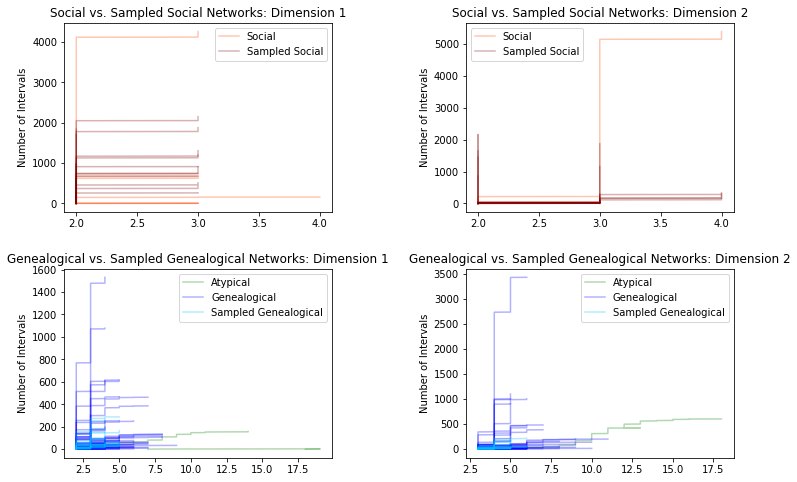

In [37]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace = .3,wspace = .5) 

plt.subplot(2,2,1)

dgms_list = setup('Social')
plot('orangered','Social',dgms_list,1)
dgms_list = setup('Social_bfs')
plot('maroon','Sampled Social',dgms_list,1)

plt.title("Social vs. Sampled Social Networks: Dimension 1")
#plt.xlabel(xlabel = "Intervals(Birth & Death Time)")
plt.ylabel(ylabel = "Number of Intervals")

plt.subplot(2,2,2)

dgms_list = setup('Social')
plot('orangered','Social',dgms_list,2)
dgms_list = setup('Social_bfs')
plot('maroon','Sampled Social',dgms_list,2)

plt.title("Social vs. Sampled Social Networks: Dimension 2")
#plt.xlabel(xlabel = "Intervals(Birth & Death Time)")
plt.ylabel(ylabel = "Number of Intervals")

plt.subplot(2,2,3)

dgms_list = setup('Family')
int_vis(dgms_list[87],color = 'green',dim = 1)
int_vis(dgms_list[-1],color = 'green',dim = 1)
int_vis(dgms_list[-2],color = 'green',leg_label = "Atypical",dim = 1)
plot('blue','Genealogical',dgms_list,1)
dgms_list = setup('Family_bfs')
plot('deepskyblue','Sampled Genealogical',dgms_list,1)

plt.title("Genealogical vs. Sampled Genealogical Networks: Dimension 1")
#plt.xlabel(xlabel = "Intervals(Birth & Death Time)")
plt.ylabel(ylabel = "Number of Intervals")

plt.subplot(2,2,4)

dgms_list = setup('Family')
int_vis(dgms_list[87],color = 'green',dim = 2)
int_vis(dgms_list[-1],color = 'green',dim = 2)
int_vis(dgms_list[-2],color = 'green',leg_label = "Atypical",dim = 2)
plot('blue','Genealogical',dgms_list,2)
dgms_list = setup('Family_bfs')
plot('deepskyblue','Sampled Genealogical',dgms_list,2)

plt.title("Genealogical vs. Sampled Genealogical Networks: Dimension 2")
#plt.xlabel(xlabel = "Intervals(Birth & Death Time)")
plt.ylabel(ylabel = "Number of Intervals")


Text(0, 0.5, 'Number of Intervals')

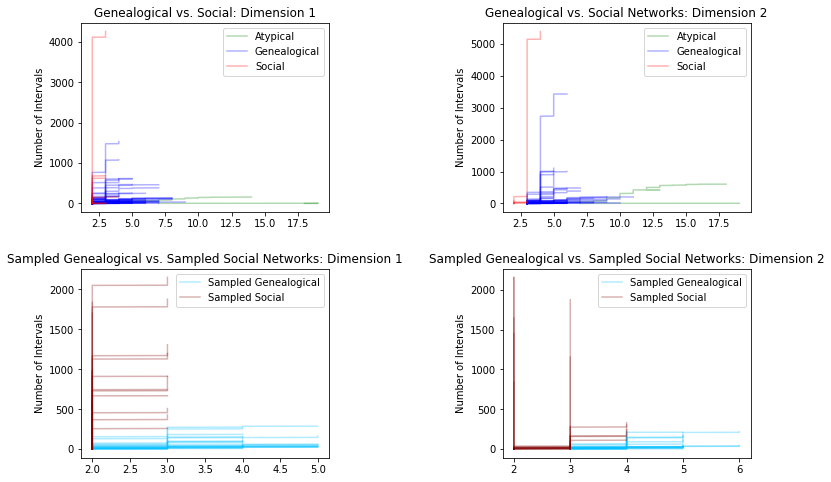

In [38]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace = .3,wspace = .7)

plt.subplot(2,2,1)

dgms_list = setup('Family')
int_vis(dgms_list[87],color = 'green',dim = 1)
int_vis(dgms_list[-1],color = 'green',dim = 1)
int_vis(dgms_list[-2],color = 'green',leg_label = "Atypical",dim = 1)
plot('blue','Genealogical',dgms_list,dim = 1)
dgms_list = setup('Social')
plot('red','Social',dgms_list,dim = 1)

plt.title("Genealogical vs. Social: Dimension 1")
#plt.xlabel(xlabel = "Intervals(Birth & Death Time)")
plt.ylabel(ylabel = "Number of Intervals")

plt.subplot(2,2,2)

dgms_list = setup('Family')
int_vis(dgms_list[87],color = 'green',dim = 2)
int_vis(dgms_list[-1],color = 'green',dim = 2)
int_vis(dgms_list[-2],color = 'green',leg_label = "Atypical",dim = 1)
plot('blue','Genealogical',dgms_list,dim = 2)
dgms_list = setup('Social')
plot('red','Social',dgms_list,dim = 2)

plt.title("Genealogical vs. Social Networks: Dimension 2")
#plt.xlabel(xlabel = "Intervals(Birth & Death Time)")
plt.ylabel(ylabel = "Number of Intervals")

plt.subplot(2,2,3)

dgms_list = setup('Family_bfs')
plot('deepskyblue','Sampled Genealogical',dgms_list,dim = 1)
dgms_list = setup('Social_bfs')
plot('maroon','Sampled Social',dgms_list,dim = 1)

plt.title("Sampled Genealogical vs. Sampled Social Networks: Dimension 1")
#plt.xlabel(xlabel = "Intervals(Birth & Death Time)")
plt.ylabel(ylabel = "Number of Intervals")

plt.subplot(2,2,4)

dgms_list = setup('Family_bfs')
plot('deepskyblue','Sampled Genealogical',dgms_list,dim = 2)
dgms_list = setup('Social_bfs')
plot('maroon','Sampled Social',dgms_list,dim = 2)

plt.title("Sampled Genealogical vs. Sampled Social Networks: Dimension 2")
#plt.xlabel(xlabel = "Intervals(Birth & Death Time)")
plt.ylabel(ylabel = "Number of Intervals")